In [24]:
from os.path import join, abspath
from os import getcwd

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from skimage.transform import resize

In [41]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [26]:
data_dir = abspath(join(getcwd(), '../../'))

In [27]:
# load covariance analysis
with open(data_dir + '/models/results/covariance_analysis/v1_nat_img_covariance.pickle', 'rb') as file:
    results = pickle.load(file)
cov_mat = results['covariance']
evecs = results['evecs']
evals = results['evals']

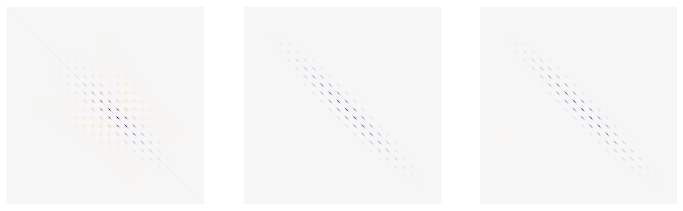

In [28]:
###### plot the covariance matrices
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 3, 1)
plt.imshow(cov_mat['data'], cmap='PuOr') # PiYG_r
plt.clim(-5, 5)
plt.axis('off')
# plt.xlim(150, 550)
# plt.ylim(150, 550)

ax = fig.add_subplot(1, 3, 2)
plt.imshow(cov_mat['model'], cmap='PuOr')
plt.clim(-5, 5)
plt.axis('off')
# plt.xlim(150, 550)
# plt.ylim(150, 550)

ax = fig.add_subplot(1, 3, 3)
plot = plt.imshow(cov_mat['finite'], cmap='PuOr')
plt.clim(-5, 5)
plt.axis('off')
# plt.xlim(150, 550)
# plt.ylim(150, 550)
# plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/covmat_v1_nat_img.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

# save the colorbar separately
fig, ax = plt.subplots(figsize=(8, 4))
cbar = plt.colorbar(plot, ax=ax)
cbar.set_ticks([])
ax.remove()
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_5/covmat_v1_colorbar.pdf', 
#             dpi=300, transparent=True,
#            bbox_inches = 'tight', pad_inches = 0)

Data: 100 evecs explain 0.62 variance
Model: 100 evecs explain 0.93 variance
Sampled neurons: 100 evecs explain 0.93 variance


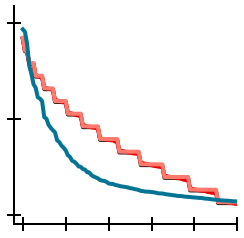

In [48]:
# plot the eigenvalues
evals['data'] /= np.sum(evals['data'])
evals['model'] /= np.sum(evals['model'])
evals['finite'] /= np.sum(evals['finite'])
evals['analytical'] /= np.sum(evals['analytical'])


t = 100
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
plt.semilogy(np.flip(evals['model'])[:t], '-', lw=4, c='#000000', alpha=1)
plt.semilogy(np.flip(evals['finite'])[:t], '-', lw=4, c='#e50000', alpha=1)
plt.semilogy(np.flip(evals['analytical'])[:t], '-', lw=4, c='#ff796c', alpha=1)
plt.semilogy(np.flip(evals['data'])[:t], '-', lw=4, c='#047495', alpha=1)
# plt.ylabel('Variance')
# plt.xlabel('PC dimension')

# format ticks
plt.xlim(-4, 100)
plt.ylim(8E-4, 1.5E-1)
plt.xticks(np.arange(0, 110, 20))
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/evals_v1_nat_img.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches = 0)

t = 100
print('Data: %d evecs explain %0.2f variance' % (t, np.sum(evals['data'][-t:])))
print('Model: %d evecs explain %0.2f variance' % (t, np.sum(evals['model'][-t:])))
print('Sampled neurons: %d evecs explain %0.2f variance' % (t, np.sum(evals['finite'][-t:])))

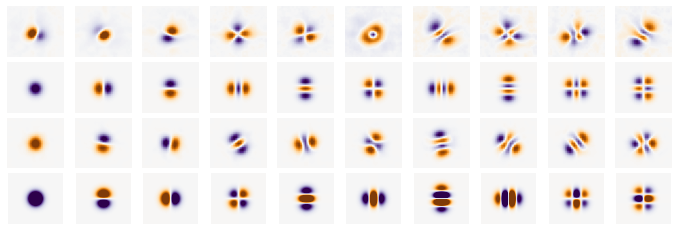

In [50]:
# plot eigenvectors
dim = (24, 27)

# sign flips
t =[-1, 1, 1, -1, -1, 1, 1, 1, 1, 1] # model & finite sign
u = [1, 1, 1, 1, -1, 1, 1, 1, 1, 1] # analytical sign


# order
m = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7] # model order
a = [0, 2, 1, 4, 5, 3, 9, 8, 6, 7] # analytical order

factor = 1 # resize factor
fig = plt.figure(figsize=(12, 4))
for i in range(10):
    ax = fig.add_subplot(4, 10, i + 1)
    img = evecs['data'][:, - i-1].reshape(dim)
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 10 + i + 1)
    img = evecs['model'][:, -i-1].reshape(dim)
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 20 + i + 1)
    img = evecs['finite'][:,  - i - 1].reshape(dim)
    img = resize(img, (img.shape[0] // factor, img.shape[1] // factor), anti_aliasing=True)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.2, 0.2)
    plt.axis('off')
    
    ax = fig.add_subplot(4, 10, 30 + i + 1)
    img = evecs['analytical'][i].reshape(240, 260)
    plt.imshow(img, cmap='PuOr')
    plt.clim(-0.3, 0.3)
    plt.axis('off')

# plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.savefig(data_dir + '/reports/figures/paper_figs/supp_figs/evecs_v1_nat_img.pdf', 
            dpi=300, transparent=True,
           bbox_inches = 'tight', pad_inches=0)